/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([[ 8. , 12. ],
       [ 4. , 15. ],
       [ 5.5, 12. ],
       [13. , 10. ]])

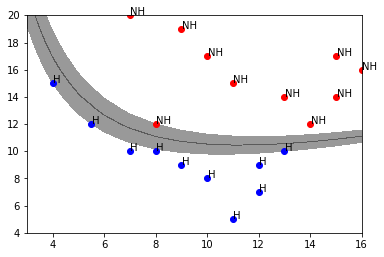

In [7]:

# Apply different SVM kernels, (linear, polynomial or RBF) to obtain the best classifier for SVM_Dataset2.csv

import numpy as np
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt

df=pd.read_csv('DS-Class-Repo/Notebooks/Datasets/SVM_Dataset2.csv')


X1=df['x1']
X2=df['x2']

X_train=np.array(list(zip(X1,X2)))
y_train=df['y'].values

# svm_classifier = svm.SVC(kernel='linear', C=10)
#svm_classifier = svm.SVC(kernel='poly', C=10)
svm_classifier = svm.SVC(kernel='poly',C=1, degree=2)
# svm_classifier = svm.SVC(kernel='rbf', gamma=0.1, C=100)
svm_classifier.fit(X_train, y_train)

color_ls = []
for k in y_train:
    if k == 1:
        color_ls.append('b')
    else:
        color_ls.append('r')
color_ls

label = []
for k in y_train:
    if k == 1:
        label.append('H')
    else:
        label.append('NH')
label

def plot_decision_boundary(clf, X, y):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max),np.arange(x2_min, x2_max))
    Z = clf.decision_function(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, colors='k', levels=[-1, 0, 1], alpha=0.4, linestyles=['--', '-', '--'])
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    

plot_decision_boundary(svm_classifier, X_train, y_train)

for k, (i,j) in enumerate(X_train):
    plt.scatter(i, j, c = color_ls[k])
    plt.text(i+0.02, j+0.02, label[k])
    
svm_classifier.support_vectors_